In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
print(sitk.Version())

SimpleITK Version: 1.1.0rc2 (ITK 4.13)
Compiled: Mar  7 2018 16:47:58



In [3]:
# Import t2 nifti file
root_dir = Path.cwd().parent
t2_path = root_dir.joinpath('nifti/ProstateX-0002/t2/4_t2_tse_tra.nii.gz')
t2_original = sitk.ReadImage(str(t2_path))

In [4]:
# Properties of original nifti image
print('Size:', t2_original.GetSize())
print('Components per pixel:', t2_original.GetNumberOfComponentsPerPixel())

Size: (384, 384, 19)
Components per pixel: 1


In [5]:
# Convert to numpy array
t2_original_np = sitk.GetArrayFromImage(t2_original)

# Get a slice of the array (10th slice)
t2_slice_original = t2_original_np[9,:,:]

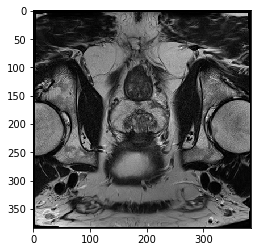

In [6]:
# Original image
plt.imshow(t2_slice_original, cmap = 'gray')

In [7]:
# Properties of 10th slice
print('Shape of slice:', t2_slice_original.shape)
print('Number of pixels in image:', 384*384)
minval, maxval = t2_slice_original.min(), t2_slice_original.max()
print(minval, maxval)

Shape of slice: (384, 384)
Number of pixels in image: 147456
0 749


## Histogram equalization
Source: [Introduction to data visualization with Python - Histogram equalization in images]()

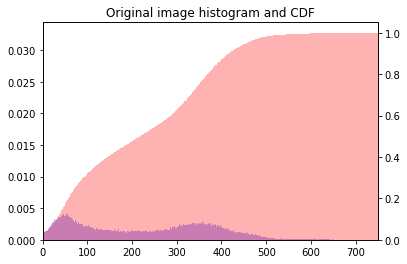

In [8]:
# Image Histogram and Cumulative Density Function of 10th slice (before equalization)
pixels = t2_slice_original.flatten()
plt.hist(pixels, bins = 749, range = (0, 749), density = True, color = 'blue', alpha = 0.3)
plt.twinx()
orig_cdf, bins, patches = plt.hist(pixels, cumulative = True, bins = 749, range = (0, 749), density = True, color = 'red', alpha = 0.3)
plt.title('Original image histogram and CDF')
plt.xlim((0,749))
plt.show()

749


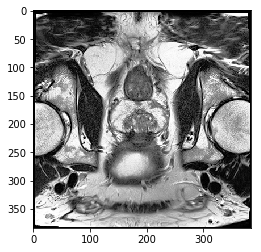

In [15]:
# Equalizing intensity values
new_pixels = np.interp(pixels, bins[:-1], orig_cdf*748)
# print(bins[:-1])
# print(orig_cdf)
# print(orig_cdf*748)

t2_slice_equalized = new_pixels.reshape(t2_slice_original.shape)
plt.imshow(t2_slice_equalized, cmap = 'gray')
plt.show()

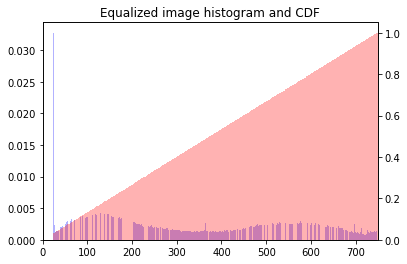

In [10]:
# Image Histogram and Cumulative Density Function of 10th slice (after equalization)
eq_pixels = t2_slice_equalized.flatten()
plt.hist(eq_pixels, bins = 749, range = (0,749), density = True, color = 'blue', alpha = 0.3)
plt.twinx()
plt.hist(eq_pixels, cumulative = True, bins = 749, range = (0, 749), density = True, color = 'red', alpha = 0.3)
plt.title('Equalized image histogram and CDF')
plt.xlim((0,749))
plt.show()